# HR-Analytics Project for determining the Attrition

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

Importing Important Libraries

In [4]:
df=pd.read_csv('HR_Analytics.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Loading the Dataset into DataFrame and checking the first five rows

In [5]:
df.shape

(1470, 35)

Showing 1470 Rows and 17 Columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Showing Data Type and Numbers

In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Descrbing important attributes.

<AxesSubplot:>

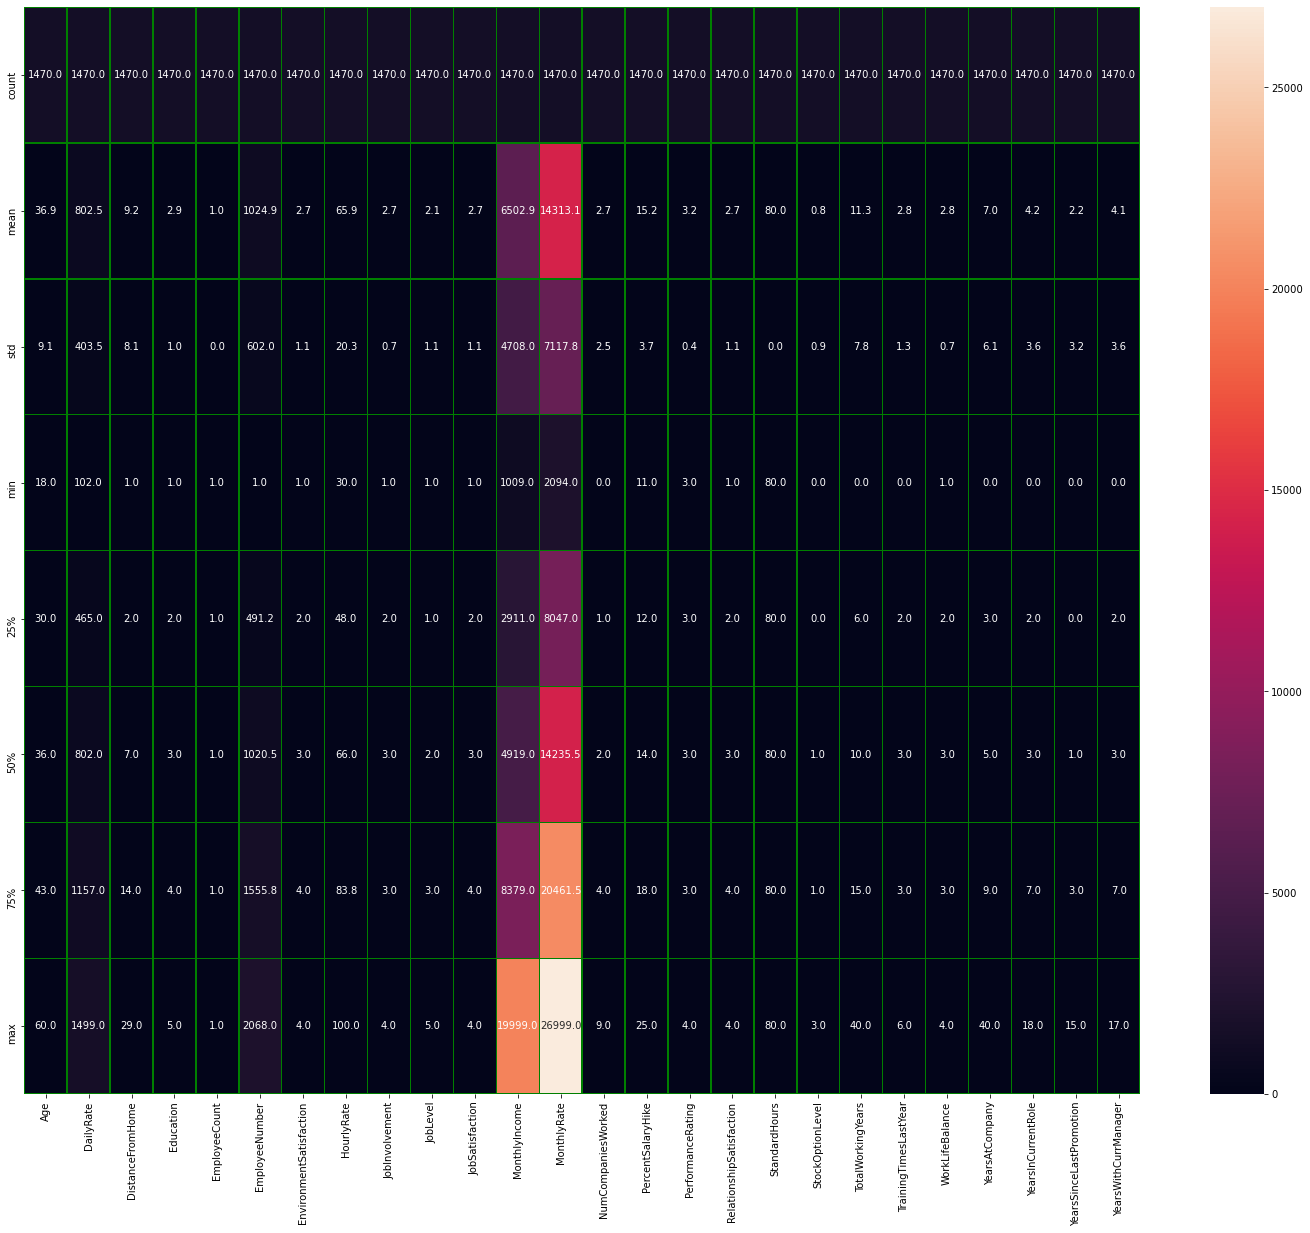

In [8]:
plt.figure(figsize=(25,20))
sns.heatmap(df.describe(),annot=True,linewidth=0.5,linecolor='green',fmt='0.1f')

Heat Map for Description of Dataset

In [9]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

The Dataset have no Missing values.

In [10]:
zerovalue=(df==0).astype(bool).sum(axis=0)
print(zerovalue)


Age                           0
Attrition                     0
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked          197
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel            631
TotalWorkingYears            11
TrainingTimesLastYear        54
WorkLifeBalance               0
YearsAtC

<AxesSubplot:>

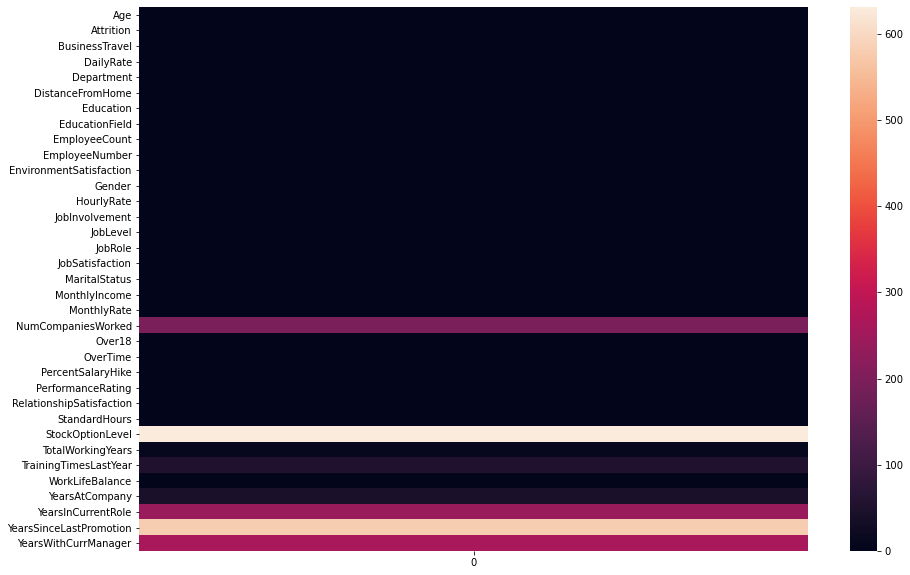

In [11]:
zerovalue1=pd.DataFrame((df==0).astype(bool).sum(axis=0))
plt.figure(figsize=(15,10))
sns.heatmap(zerovalue1)

Heatmap of Zero Value showing the occurance of zeros values in light shade.

In [12]:
skew=df.skew().sort_values(ascending=False)
print(skew)

YearsSinceLastPromotion     1.984290
PerformanceRating           1.921883
YearsAtCompany              1.764529
MonthlyIncome               1.369817
TotalWorkingYears           1.117172
NumCompaniesWorked          1.026471
JobLevel                    1.025401
StockOptionLevel            0.968980
DistanceFromHome            0.958118
YearsInCurrentRole          0.917363
YearsWithCurrManager        0.833451
PercentSalaryHike           0.821128
TrainingTimesLastYear       0.553124
Age                         0.413286
MonthlyRate                 0.018578
EmployeeNumber              0.016574
StandardHours               0.000000
EmployeeCount               0.000000
DailyRate                  -0.003519
HourlyRate                 -0.032311
Education                  -0.289681
RelationshipSatisfaction   -0.302828
EnvironmentSatisfaction    -0.321654
JobSatisfaction            -0.329672
JobInvolvement             -0.498419
WorkLifeBalance            -0.552480
dtype: float64


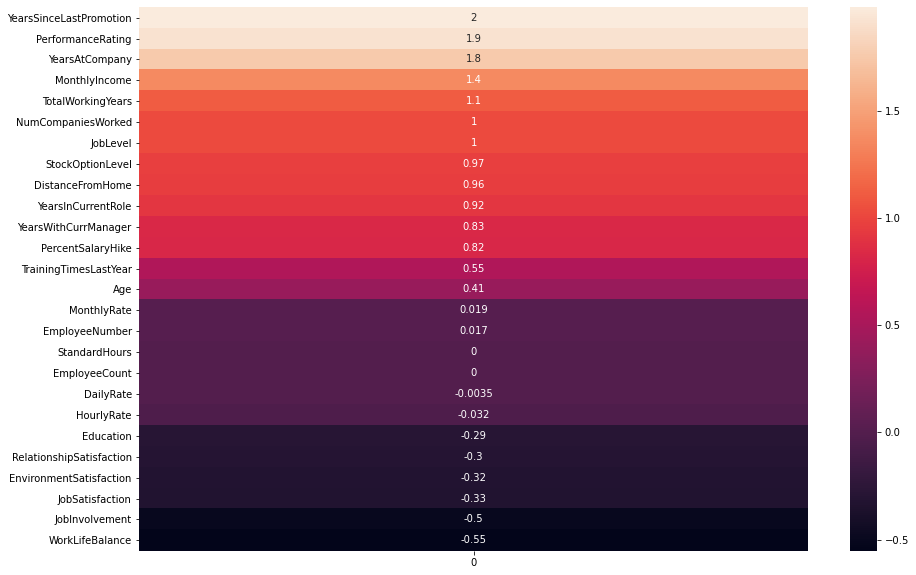

In [13]:
skew1=pd.DataFrame(skew)
plt.figure(figsize=(15,10))
sns.heatmap(skew1,annot=True)
plt.show()

Heat Map showing negative skewness below Daily Rate.

YearsSinceLastPromotion     1.000000
YearsAtCompany              0.618409
YearsInCurrentRole          0.548056
YearsWithCurrManager        0.510224
TotalWorkingYears           0.404858
JobLevel                    0.353885
MonthlyIncome               0.344978
Age                         0.216513
Education                   0.054254
RelationshipSatisfaction    0.033493
PerformanceRating           0.017896
EnvironmentSatisfaction     0.016194
StockOptionLevel            0.014352
DistanceFromHome            0.010029
WorkLifeBalance             0.008941
MonthlyRate                 0.001567
TrainingTimesLastYear      -0.002067
EmployeeNumber             -0.009019
JobSatisfaction            -0.018214
PercentSalaryHike          -0.022154
JobInvolvement             -0.024184
HourlyRate                 -0.026716
DailyRate                  -0.033229
NumCompaniesWorked         -0.036814
EmployeeCount                    NaN
StandardHours                    NaN
Name: YearsSinceLastPromotion, dtype: 

<AxesSubplot:>

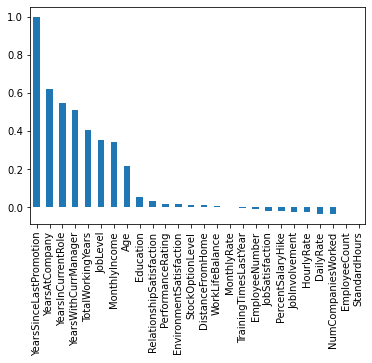

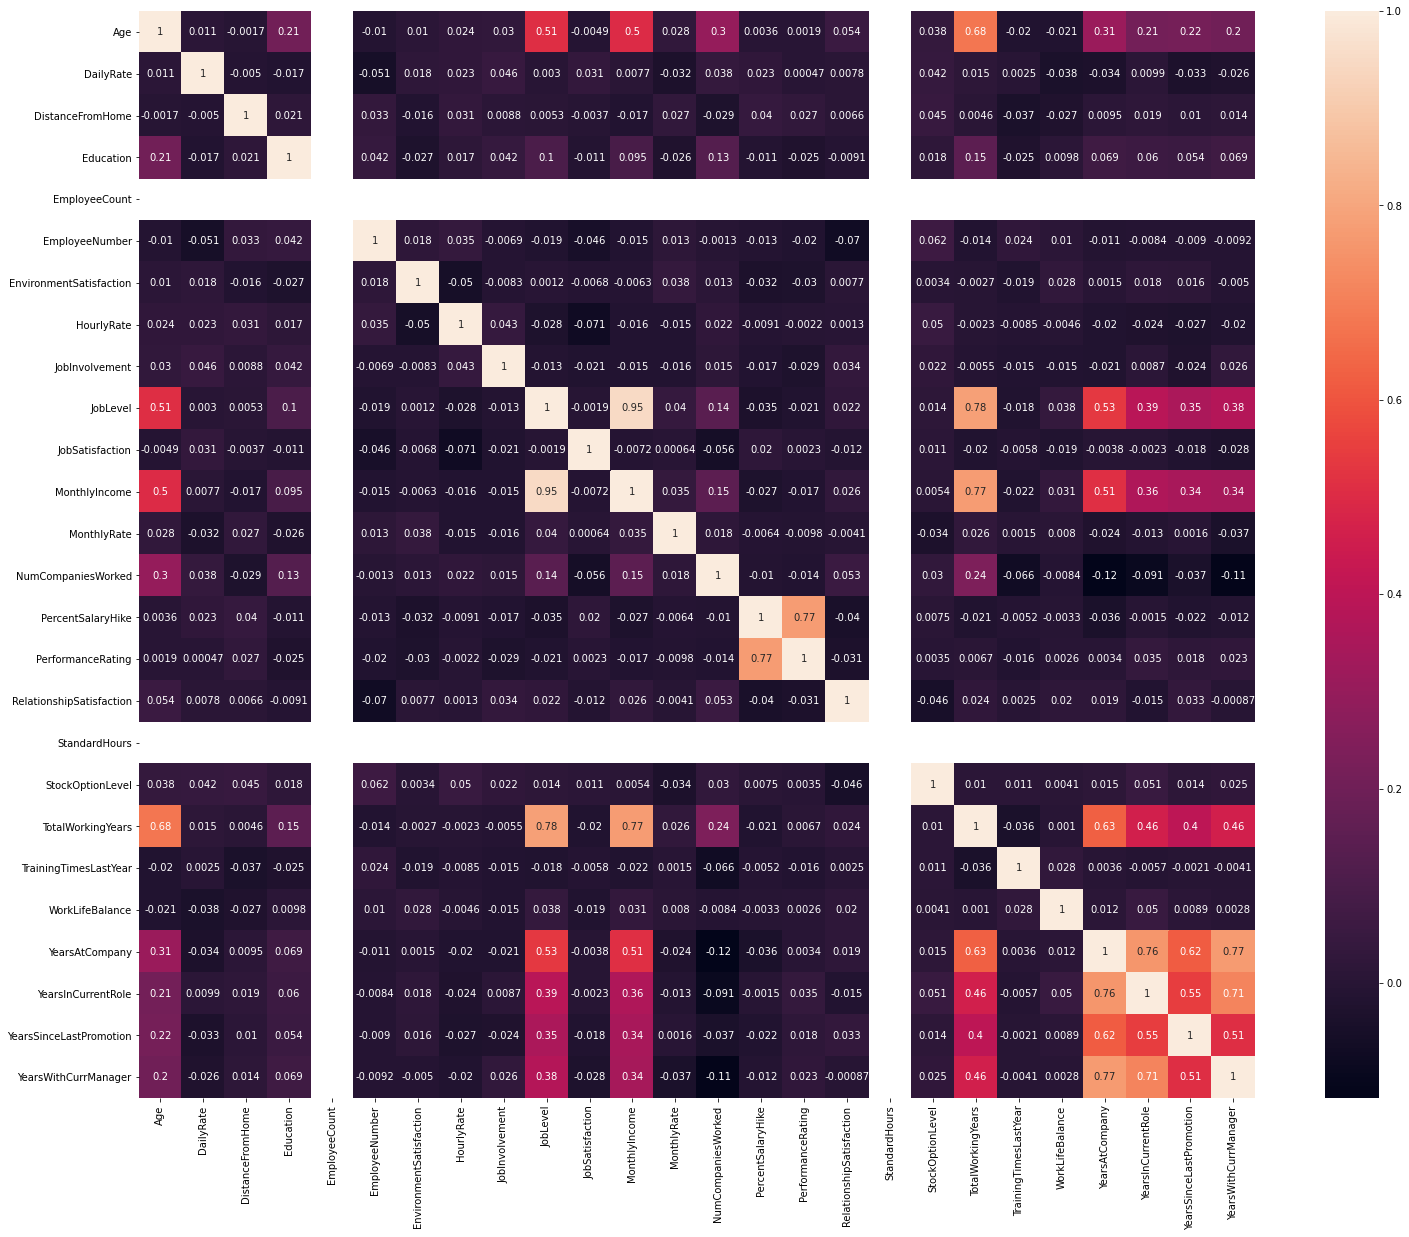

In [14]:
cor=df.corr()['YearsSinceLastPromotion'].sort_values(ascending=False)
print(cor)
cor.plot(kind='bar')
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),annot=True)

Showing low correlation between columns.

<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='count'>

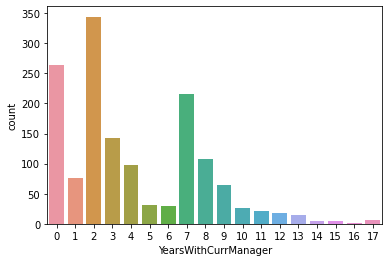

In [16]:
sns.countplot(x='YearsWithCurrManager',data=df)

This Bar plot shows high count in 2,0 anf 7.

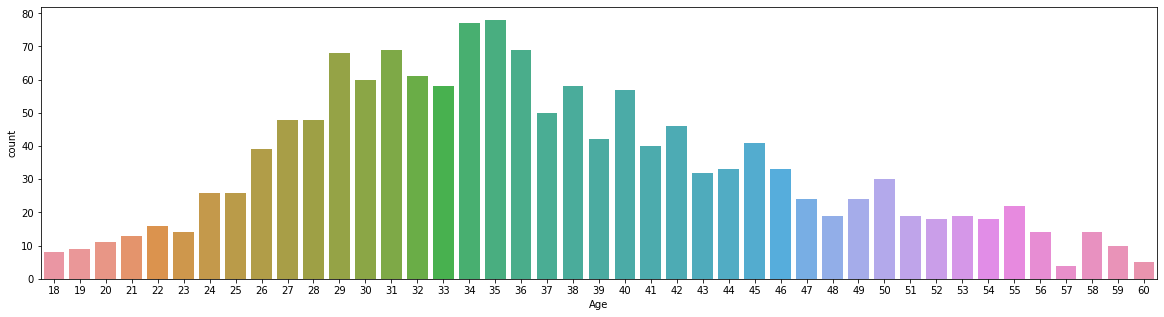

In [17]:
plt.figure(figsize=(20,5))
sns.countplot(x='Age',data=df)
plt.show()

This plot showa high distribution plot with 34 and 35 age gruop to be highest.

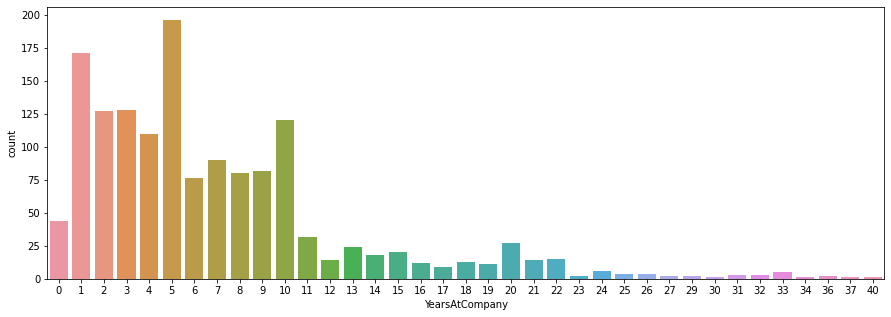

In [18]:
plt.figure(figsize=(15,5))
sns.countplot(x='YearsAtCompany',data=df)
plt.show()

This show high count of 1 to 10 

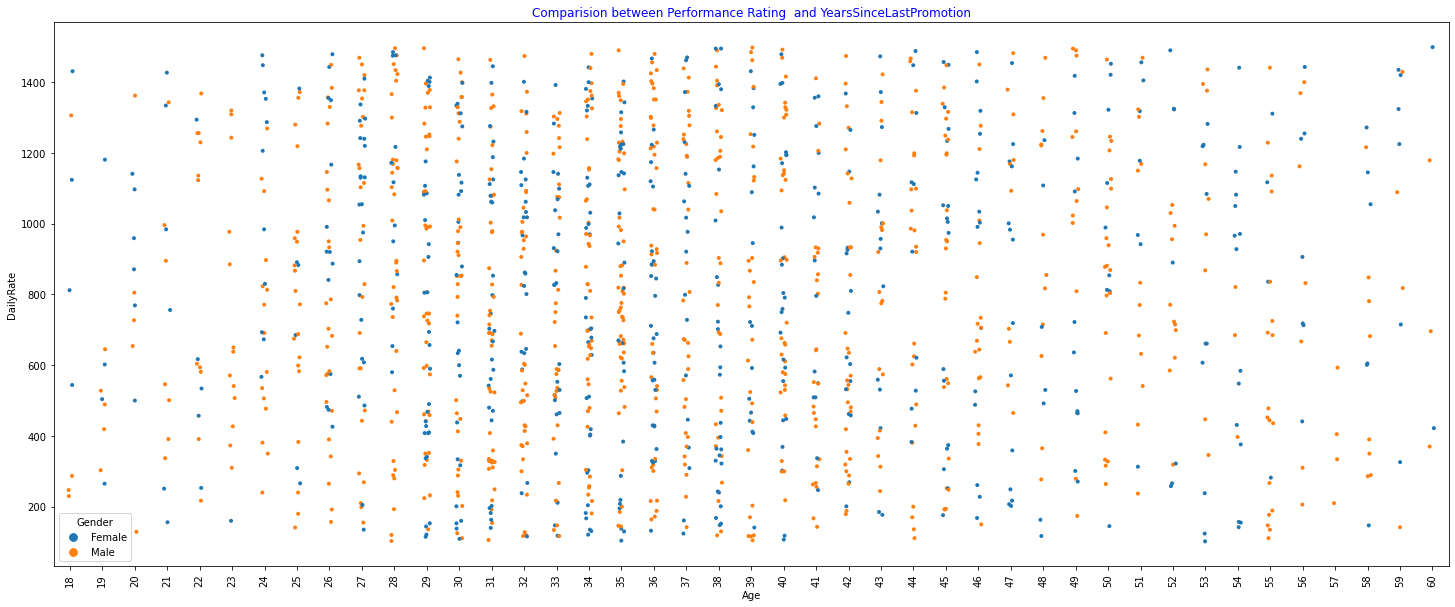

In [20]:
plt.figure(figsize=(25,10))
plt.xticks(rotation = 90)
plt.title('Comparision between Performance Rating  and YearsSinceLastPromotion',color='blue')
sns.stripplot(x='Age',y='DailyRate',data=df,size=4,hue='Gender')
plt.show()

# Here Since the number of columns is large, pair plot between Columns is Plotted in two parts.

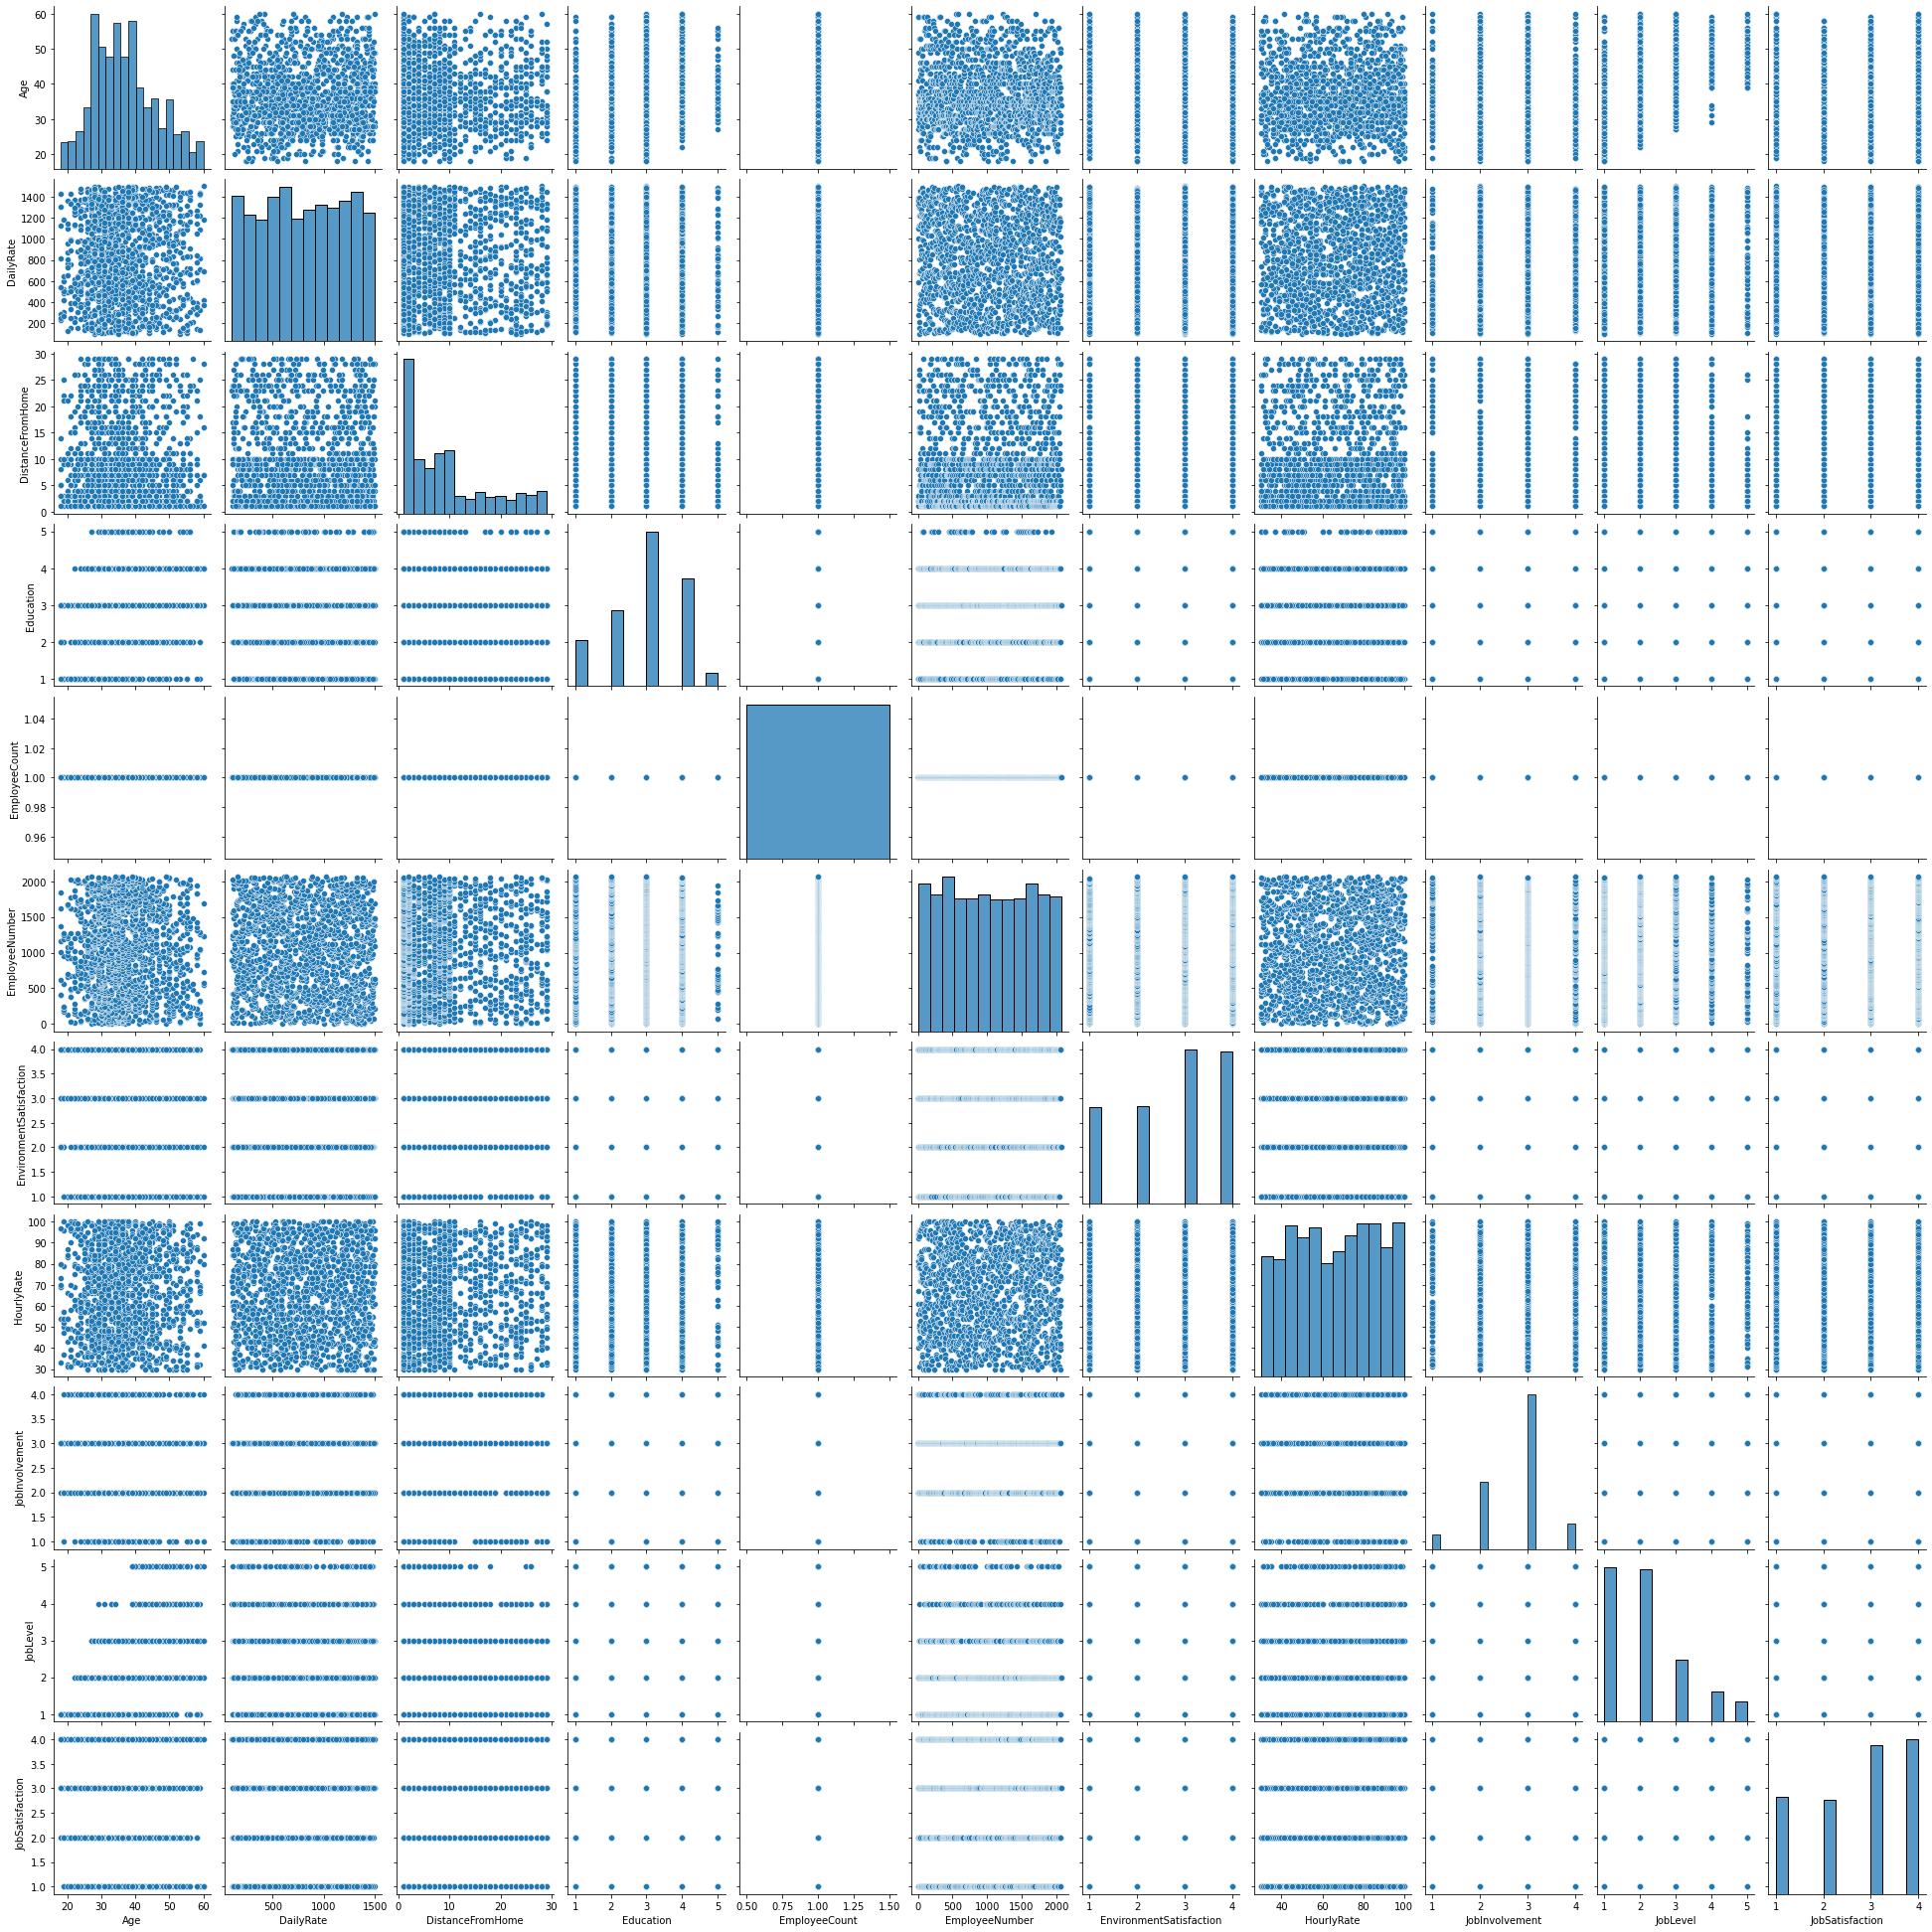

In [21]:
sns.pairplot(df.iloc[:,:18])

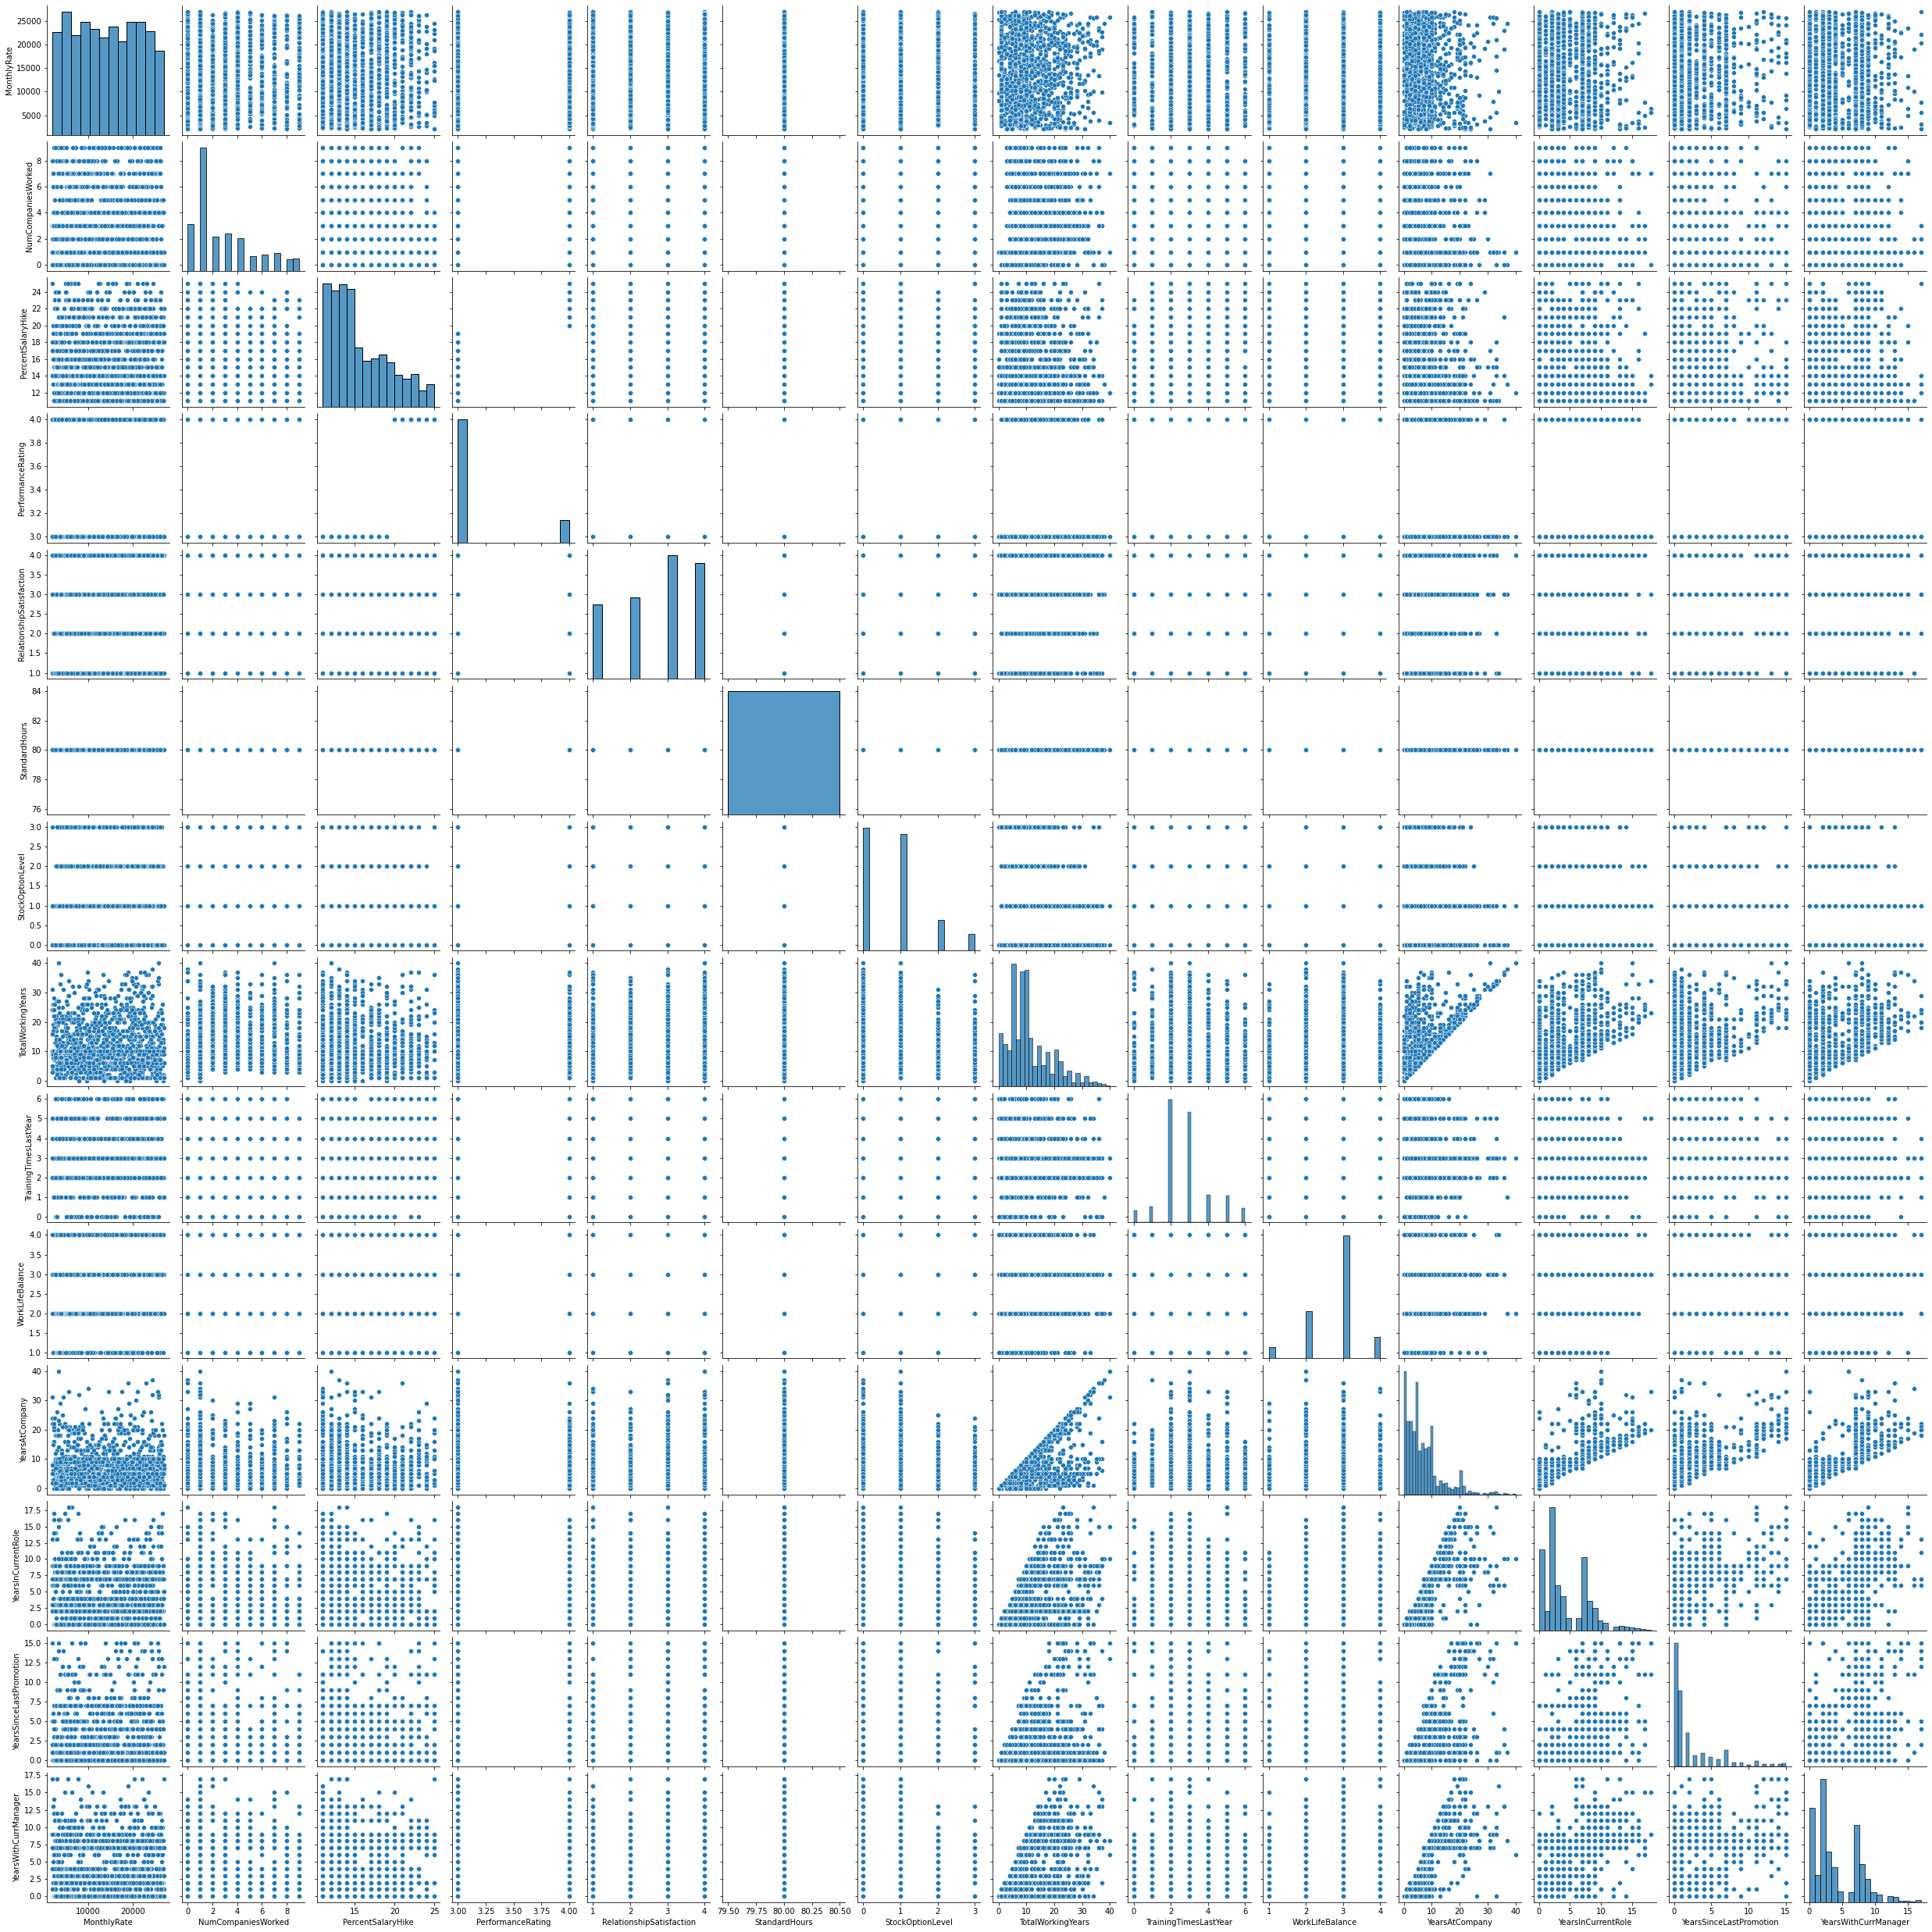

In [22]:
sns.pairplot(df.iloc[:,19:])

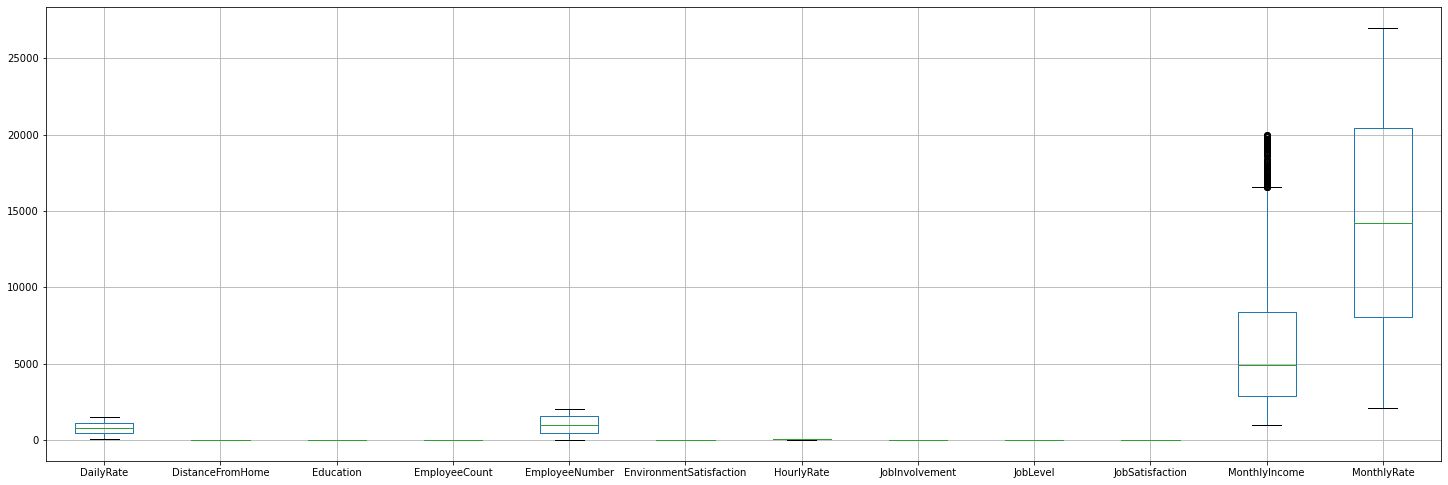

In [23]:
plt.figure(figsize=(25,10))
df.iloc[:,1:20].boxplot()
plt.subplots_adjust(bottom=0.25)
plt.show()

Here we see that monthly income has high outliers.

# Label Encoding Columns


In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
lenc=LabelEncoder()
for i in df.columns:
    df[i]=lenc.fit_transform(df[i])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0,1,1,0,0,...,0,0,0,8,0,0,6,4,0,5
1,31,0,1,113,1,7,0,1,0,1,...,3,0,1,10,3,2,10,7,1,7
2,19,1,2,805,1,1,1,4,0,2,...,1,0,0,7,3,2,0,0,0,0
3,15,0,1,820,1,2,3,1,0,3,...,2,0,0,8,3,2,8,7,3,0
4,9,0,2,312,1,1,0,3,0,4,...,3,0,1,6,3,2,2,2,2,2


# Train, Test Split

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
x=df.drop(['Attrition'],axis=1)
print(x.shape)
y1=df['Attrition'].to_numpy()
y=pd.DataFrame(y1)
print(y.shape)

(1470, 34)
(1470, 1)


In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=50)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1323, 34)
(147, 34)
(1323, 1)
(147, 1)


# 1. Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [29]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
lg1=LogisticRegression()
lg1_cv=GridSearchCV(lg1,grid,cv=10)
lg1_cv.fit(x_train,y_train)
print("tuned hpyerparameters :(best parameters) ",lg1_cv.best_params_)
print("accuracy :",lg1_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2'}
accuracy : 0.8428058783321941


In [30]:
lg=LogisticRegression(C=0.01,penalty='l2')
lg.fit(x_train,y_train)
lg.score(x_train,y_train)
predlg=lg.predict(x_test)
print('Accuracy Report is',accuracy_score(y_test,predlg)*100,'Percentage')
print('Confusion Matrix','\n',confusion_matrix(y_test,predlg))
print('Classification Report',classification_report(y_test,predlg))

Accuracy Report is 85.03401360544217 Percentage
Confusion Matrix 
 [[124   0]
 [ 22   1]]
Classification Report               precision    recall  f1-score   support

           0       0.85      1.00      0.92       124
           1       1.00      0.04      0.08        23

    accuracy                           0.85       147
   macro avg       0.92      0.52      0.50       147
weighted avg       0.87      0.85      0.79       147



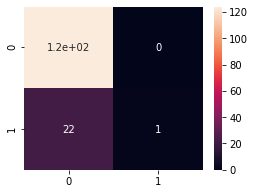

In [31]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,predlg),annot=True)
plt.show()

# 2. Decision Tree Classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
grid= {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
dtc1=DecisionTreeClassifier()
dtc1_cv=GridSearchCV(dtc1,grid,cv=5)
dtc1_cv.fit(x_train,y_train)
print("Tuned hpyerparameters :(best parameters) ",dtc1_cv.best_params_)
print("Accuracy :",dtc1_cv.best_score_)


Tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 4}
Accuracy : 0.8412664379645511


In [34]:
dtc=DecisionTreeClassifier(criterion='entropy',max_depth=4)
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print('Accuracy Report is',accuracy_score(y_test,preddtc)*100,'Percentage')
print('Confusion Matrix','\n',confusion_matrix(y_test,preddtc))
print('Classification Report',classification_report(y_test,preddtc))

Accuracy Report is 85.03401360544217 Percentage
Confusion Matrix 
 [[122   2]
 [ 20   3]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.98      0.92       124
           1       0.60      0.13      0.21        23

    accuracy                           0.85       147
   macro avg       0.73      0.56      0.57       147
weighted avg       0.82      0.85      0.81       147



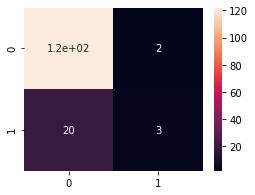

In [35]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,preddtc),annot=True)
plt.show()

# 3. Support Vector Classifier

In [60]:
from sklearn.svm import SVC 
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [61]:
svm1=SVC()
gamma_range=[0.001, 0.01, 0.1, 1, 10, 100]
c_range=[0.001, 0.01, 0.1, 1, 10, 100,1000]
grid= dict(gamma = gamma_range, C = c_range)
svm1_cv=GridSearchCV(svm1,grid,cv=5)
svm1_cv.fit(x_train,y_train)
print("tuned hpyerparameters :(best parameters) ",svm1_cv.best_params_)
print("accuracy :",svm1_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.001, 'gamma': 0.001}
accuracy : 0.8382475700400228


In [63]:
svc=SVC(C=0.001,gamma=0.001)
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print('Accuracy Score',accuracy_score(y_test,predsvc))
print('Confusion Matrix',confusion_matrix(y_test,predsvc))
print('Classification Report',classification_report(y_test,predsvc))

Accuracy Score 0.8435374149659864
Confusion Matrix [[124   0]
 [ 23   0]]
Classification Report               precision    recall  f1-score   support

           0       0.84      1.00      0.92       124
           1       0.00      0.00      0.00        23

    accuracy                           0.84       147
   macro avg       0.42      0.50      0.46       147
weighted avg       0.71      0.84      0.77       147



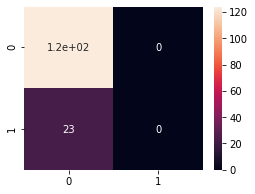

In [64]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,predsvc),annot=True)
plt.show()

# 4. K-Neighbors Classifier

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
knn=KNeighborsClassifier(n_neighbors=500)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print('Accuracy Score',accuracy_score(y_test,predknn))
print('Confusion Matrix','\n',confusion_matrix(y_test,predknn))
print('Classification Report',classification_report(y_test,predknn))

Accuracy Score 0.8435374149659864
Confusion Matrix 
 [[124   0]
 [ 23   0]]
Classification Report               precision    recall  f1-score   support

           0       0.84      1.00      0.92       124
           1       0.00      0.00      0.00        23

    accuracy                           0.84       147
   macro avg       0.42      0.50      0.46       147
weighted avg       0.71      0.84      0.77       147



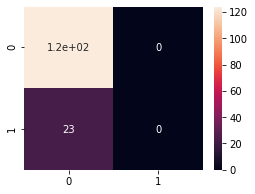

In [47]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,predknn),annot=True)
plt.show()

# 5. Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
predrfc=rfc.predict(x_test)
print('Accuracy Score',accuracy_score(y_test,predrfc))
print('Confusion Matrix','\n',confusion_matrix(y_test,predrfc))
print('Classification Report',classification_report(y_test,predrfc))

Accuracy Score 0.8571428571428571
Confusion Matrix 
 [[122   2]
 [ 19   4]]
Classification Report               precision    recall  f1-score   support

           0       0.87      0.98      0.92       124
           1       0.67      0.17      0.28        23

    accuracy                           0.86       147
   macro avg       0.77      0.58      0.60       147
weighted avg       0.83      0.86      0.82       147



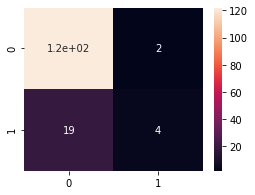

In [50]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,predrfc),annot=True)
plt.show()

# 6. AdaBoost Classifier

In [51]:
from sklearn.ensemble import AdaBoostClassifier

In [52]:
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
ad.score(x_train,y_train)
predad=ad.predict(x_test)
print('Accuracy Score',accuracy_score(y_test,predad))
print('Confusion Matrix','\n',confusion_matrix(y_test,predad))
print('Classification Report',classification_report(y_test,predad))

Accuracy Score 0.8843537414965986
Confusion Matrix 
 [[121   3]
 [ 14   9]]
Classification Report               precision    recall  f1-score   support

           0       0.90      0.98      0.93       124
           1       0.75      0.39      0.51        23

    accuracy                           0.88       147
   macro avg       0.82      0.68      0.72       147
weighted avg       0.87      0.88      0.87       147



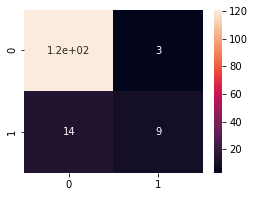

In [53]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,predad),annot=True)
plt.show()

# Cross Validation Score

In [65]:
from sklearn.model_selection import cross_val_score

In [66]:
model=[lg,dtc,svc,knn,rfc,ad]
for i in model:
    score=cross_val_score(i,x,y,cv=10)
    print('Cross Val Score of',i,'=',score)
    print('Mean Score of',i,'=',score.mean())
    print('Difference of Accuracy in',i,'and Cross Val Score of',i,'is=',accuracy_score(y_test,i.predict(x_test))-score.mean())
    print('\n')

Cross Val Score of LogisticRegression(C=0.01) = [0.85034014 0.82993197 0.85034014 0.85034014 0.85034014 0.85034014
 0.82993197 0.84353741 0.84353741 0.84353741]
Mean Score of LogisticRegression(C=0.01) = 0.8442176870748298
Difference of Accuracy in LogisticRegression(C=0.01) and Cross Val Score of LogisticRegression(C=0.01) is= 0.00612244897959191


Cross Val Score of DecisionTreeClassifier(criterion='entropy', max_depth=4) = [0.83673469 0.82993197 0.83673469 0.83673469 0.82993197 0.82993197
 0.82312925 0.85034014 0.86394558 0.83673469]
Mean Score of DecisionTreeClassifier(criterion='entropy', max_depth=4) = 0.8374149659863945
Difference of Accuracy in DecisionTreeClassifier(criterion='entropy', max_depth=4) and Cross Val Score of DecisionTreeClassifier(criterion='entropy', max_depth=4) is= 0.01292517006802718


Cross Val Score of SVC(C=0.001, gamma=0.001) = [0.83673469 0.83673469 0.83673469 0.83673469 0.83673469 0.83673469
 0.83673469 0.84353741 0.84353741 0.84353741]
Mean Score of SV

# Conclusion

In [ ]:
From the above Model we have AdaBoost Classifier as the highest Accuracy Score of 86%. hence we use AdaBoost Classifier

# Saving the Model

In [67]:
import joblib

In [68]:
joblib.dump(ad,'bankad.org')

['bankad.org']

In [69]:
bankfile=joblib.load('bankad.org')
bankfile.predict(x_train)

array([1, 1, 0, ..., 0, 1, 0])